# GRUPPEN-PROJEKT 12


Wie bereits erwähnt, wird es in diesem zweiten Notebook darum gehen, fortgeschrittene Analysetechniken anzuwenden, um zu bewerten, welche Faktoren tatsächlich das Niveau der Adipositas in den verschiedenen Gruppen von Individuen (Männer und Frauen) beeinflussen.

----

Da wir an zwei Notebooks arbeiten, ist es unerlässlich, sowohl die Bibliotheken anzurufen als auch unser DataFrame erneut herunterzuladen und es lesbar zu machen. Ebenso wichtig ist es, die Tabellen wiederherzustellen, an denen wir gearbeitet haben.

----

In [1]:
import pandas as  pd
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_percentage_error

# Bibliotheken werden nach und nach angepasst

In [2]:
FILENAME_DATASET = "c:\\Users\\molom\\Kurs_Predictive_Analytics\\kurs_predictive_analytics\\data\\ObesityDataSet.csv"  # Hier den Pfad anpassen
df = pd.read_csv(FILENAME_DATASET,sep=",")

df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


--- Einige Schritte werden widerholt , um weiter machen zu können---

In [3]:
benötigte_spalten = [ 'Gender','Height', 'Weight', 'CALC', 'FAVC','family_history_with_overweight', 'TUE',
       'CAEC','NObeyesdad']



# Die Variable **df** ist der neue DataFrame,der nur die ausgewählten Spalten für unsere Analyse enthält
df = df[benötigte_spalten]


# Zeige das DataFrame mit den ausgewählten Spalten an
df

,Gender,Height,Weight,CALC,FAVC,family_history_with_overweight,TUE,CAEC,NObeyesdad
0,Female,1.620000,64.000000,no,no,yes,1.000000,Sometimes,Normal_Weight
1,Female,1.520000,56.000000,Sometimes,no,yes,0.000000,Sometimes,Normal_Weight
2,Male,1.800000,77.000000,Frequently,no,yes,1.000000,Sometimes,Normal_Weight
3,Male,1.800000,87.000000,Frequently,no,no,0.000000,Sometimes,Overweight_Level_I
4,Male,1.780000,89.800000,Sometimes,no,no,0.000000,Sometimes,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,1.710730,131.408528,Sometimes,yes,yes,0.906247,Sometimes,Obesity_Type_III
2107,Female,1.748584,133.742943,Sometimes,yes,yes,0.599270,Sometimes,Obesity_Type_III
2108,Female,1.752206,133.689352,Sometimes,yes,yes,0.646288,Sometimes,Obesity_Type_III
2109,Female,1.739450,133.346641,Sometimes,yes,yes,0.586035,Sometimes,Obesity_Type_III


In [4]:
df['BMI'] = df['Weight'] / (df['Height'])**2

df

C:\Users\molom\AppData\Local\Temp\ipykernel_60572\757064620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = df['Weight'] / (df['Height'])**2


,Gender,Height,Weight,CALC,FAVC,family_history_with_overweight,TUE,CAEC,NObeyesdad,BMI
0,Female,1.620000,64.000000,no,no,yes,1.000000,Sometimes,Normal_Weight,24.386526
1,Female,1.520000,56.000000,Sometimes,no,yes,0.000000,Sometimes,Normal_Weight,24.238227
2,Male,1.800000,77.000000,Frequently,no,yes,1.000000,Sometimes,Normal_Weight,23.765432
3,Male,1.800000,87.000000,Frequently,no,no,0.000000,Sometimes,Overweight_Level_I,26.851852
4,Male,1.780000,89.800000,Sometimes,no,no,0.000000,Sometimes,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...
2106,Female,1.710730,131.408528,Sometimes,yes,yes,0.906247,Sometimes,Obesity_Type_III,44.901475
2107,Female,1.748584,133.742943,Sometimes,yes,yes,0.599270,Sometimes,Obesity_Type_III,43.741923
2108,Female,1.752206,133.689352,Sometimes,yes,yes,0.646288,Sometimes,Obesity_Type_III,43.543817
2109,Female,1.739450,133.346641,Sometimes,yes,yes,0.586035,Sometimes,Obesity_Type_III,44.071535


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Height                          2111 non-null   float64
 2   Weight                          2111 non-null   float64
 3   CALC                            2111 non-null   object 
 4   FAVC                            2111 non-null   object 
 5   family_history_with_overweight  2111 non-null   object 
 6   TUE                             2111 non-null   float64
 7   CAEC                            2111 non-null   object 
 8   NObeyesdad                      2111 non-null   object 
 9   BMI                             2111 non-null   float64
dtypes: float64(4), object(6)
memory usage: 165.1+ KB


# EXPLORATION UND INTERPRETATION

## TEIL 1 . BEI MÄNNERN 

In diesem Teil werden wir uns ausschließlich mit den Männern beschäftigen. Der zweite Teil wird dem Studium der Phänomene bei Frauen gewidmet sein und die Unterschiede aufzeigen.

In [6]:
data_men, data_women = df[df['Gender'] == 'Male'].drop(columns='Gender'), df[df['Gender'] == 'Female'].drop(columns='Gender')
men_count, women_count = data_men.count(), data_women.count()

**FAVC, CALC  Vs NObeyesdad (obesity level)**

Hier wollen wir die erste hypothese tief untersuchen und zwar wie die Ernährung  und Alcohol   einen Einfluss auf die Fettleibigkeit der Männer haben  könnte. 

In [7]:

def count_by_as_str(arr, value):
    return (arr == value).sum()

(data_men.groupby(data_men['NObeyesdad']).aggregate(
    Always=pd.NamedAgg('CALC', lambda arr : count_by_as_str(arr, 'Always')),
    Frequently=pd.NamedAgg('CALC', lambda arr : count_by_as_str(arr, 'Frequently')),
    Sometimes=pd.NamedAgg('CALC', lambda arr : count_by_as_str(arr, 'Sometimes')),
    No=pd.NamedAgg('CALC', lambda arr : count_by_as_str(arr, 'no'))))

,Always,Frequently,Sometimes,No
NObeyesdad,,,,
Insufficient_Weight,0,0,47,52
Normal_Weight,1,11,89,45
Obesity_Type_I,0,13,95,87
Obesity_Type_II,0,2,223,70
Obesity_Type_III,0,0,1,0
Overweight_Level_I,0,7,114,24
Overweight_Level_II,0,9,121,57


In [8]:
#Häufiger Konsum von kalorienreichen Lebensmitteln und Einfluss auf die Fettleibigkeit

def count_by_as_str(arr, value):
    return (arr == value).sum()

(data_men.groupby(data_men['NObeyesdad'])[['FAVC']]
.agg(lambda arr: count_by_as_str(arr, 'yes')))

,FAVC
NObeyesdad,
Insufficient_Weight,96
Normal_Weight,101
Obesity_Type_I,186
Obesity_Type_II,289
Obesity_Type_III,1
Overweight_Level_I,134
Overweight_Level_II,159


Dieser Tabelle zeigt die Häufigkeit des Konsums von kalorienreichen Lebensmitteln (FAVC) in Bezug auf die Gewichtskategorien (NObeyesdad). Die Daten offenbaren, dass Männer mit Obesity_Type_II am häufigsten kalorienreiche Lebensmittel konsumieren, gefolgt von denen mit Obesity_Type_I und Overweight_Level_II. Männer mit Normalgewicht konsumieren diese Lebensmittel seltener als übergewichtige oder fettleibige Männer. Männer mit Untergewicht und Obesity_Type_III haben die niedrigsten Konsumraten. Insgesamt scheint der Konsum von kalorienreichen Lebensmitteln bei übergewichtigen oder fettleibigen Männern höher zu sein.

**family_history_with_overweight	Vs NObeyesdad (obesity level)**

In [9]:
(data_men.groupby(data_men['NObeyesdad']).aggregate(

    Yes=pd.NamedAgg('family_history_with_overweight', lambda arr : count_by_as_str(arr, 'yes')),
    No=pd.NamedAgg('family_history_with_overweight', lambda arr : count_by_as_str(arr, 'no'))))

,Yes,No
NObeyesdad,,
Insufficient_Weight,82,17
Normal_Weight,79,67
Obesity_Type_I,189,6
Obesity_Type_II,295,0
Obesity_Type_III,1,0
Overweight_Level_I,98,47
Overweight_Level_II,171,16


Diese Tabelle zeigt die Verteilung der familiären Vorgeschichte von Übergewicht (family_history_with_overweight) in Bezug auf die verschiedenen Gewichtskategorien (NObeyesdad). Die Ergebnisse zeigen, dass die Mehrheit der fettleibigen Personen (alle Typen) eine familiäre Vorgeschichte von Übergewicht ("Ja") haben. Insbesondere haben 295 Personen mit Obesity_Type_II und 189 Personen mit Obesity_Type_I mit "Ja" geantwortet. Im Gegensatz dazu ist die Verteilung unter den Personen mit Normal- oder Untergewicht ausgeglichener, obwohl auch hier eine Prävalenz einer familiären Vorgeschichte von Übergewicht besteht. Insgesamt deuten diese Daten auf eine starke Korrelation zwischen der familiären Vorgeschichte von Übergewicht und Fettleibigkeit hin.

**zwischendurch naschen (CAEC) Vs NObeyesdad (obesity level)**

In [10]:
(data_men.groupby(data_men['NObeyesdad']).aggregate(
    Always=pd.NamedAgg('CAEC', lambda arr : count_by_as_str(arr, 'Always')),
    Frequently=pd.NamedAgg('CAEC', lambda arr : count_by_as_str(arr, 'Frequently')),
    Sometimes=pd.NamedAgg('CAEC', lambda arr : count_by_as_str(arr, 'Sometimes')),
    No=pd.NamedAgg('CAEC', lambda arr : count_by_as_str(arr, 'no'))))

,Always,Frequently,Sometimes,No
NObeyesdad,,,,
Insufficient_Weight,2,11,86,0
Normal_Weight,16,49,76,5
Obesity_Type_I,5,3,186,1
Obesity_Type_II,1,1,292,1
Obesity_Type_III,0,1,0,0
Overweight_Level_I,4,6,107,28
Overweight_Level_II,2,10,174,1



Die Tabelle zeigt, dass insbesondere übergewichtige Männer, insbesondere solche mit Adipositas Typ II, hauptsächlich zwischen den Mahlzeiten knabbern, besonders "Sometimes". Männer mit normalem Gewicht haben eine ausgewogenere Verteilung, während diejenigen mit Untergewicht selten knabbern. Das Knabbern scheint also bei übergewichtigen Personen häufiger vorzukommen, was auf eine mögliche Korrelation zwischen Fettleibigkeit und der Häufigkeit des Knabberns zwischen den Mahlzeiten hindeutet

**Langzeitnutzung von Technologien (TUE) Vs NObeyesdad (obesity level)**

In [11]:

def average_hours(arr):
    return arr.mean()

# Gruppierung von Daten nach Gewichtskategorien (NObeyesdad) und Berechnung des Durchschnitts der TUE-Stunden
time = (data_men.groupby(data_men['NObeyesdad'])[['TUE']]
          .agg(average_hours)
          .reset_index())
time

,NObeyesdad,TUE
0,Insufficient_Weight,1.025635
1,Normal_Weight,0.678082
2,Obesity_Type_I,0.842226
3,Obesity_Type_II,0.511899
4,Obesity_Type_III,1.000000
5,Overweight_Level_I,0.518051
6,Overweight_Level_II,0.651322


Die Ergebnisse zeigen eine Variation der mit Technologie verbrachten Stunden je nach Fettleibigkeitsgrad. Personen mit Untergewicht oder Adipositas Typ III verbringen mehr Zeit mit Technologie. Im Gegensatz dazu verbringen Personen mit normalem Gewicht und solche mit Adipositas Typ II weniger Zeit. Dies könnte darauf hindeuten, dass die Nutzung von Technologie keine einfache lineare Korrelation mit dem BMI aufweist und dass andere Faktoren diese Beziehung beeinflussen können.

# KORRELATION

*ES IST SEHR WICHTIG HIER ZU BEACHTEN, DASS DER BMI EINE **NUMERISCHE ÜBERSETZUNG** ODER EINE **NUMERISCHE DARSTELLUNG** DES ADIPOSITÄTSGRADES JEDES EINZELNEN INDIVIDUUMS IST, DER HIER DURCH DIE VARIABLE **NObeyesdad** DARGESTELLT WIRD, DIE EHER WERTE IN FORM VON KATEGORIEN ENTHÄLT*

## Vorbereitung der Features
Als nächstes sollen noch einige Features aufbereitet werden, bevor wir die Modelle trainieren.

### Definiere die Zielvariable
Wir definieren an dieser Stelle die Zielvariable -- unser `y`

Hier ist unsere Zielvariable 'y' der 'BMI', der Body-Mass-Index (BMI) für jede Person. Er ist tatsächlich die numerische und konventionelle Darstellung der kategorischen Variable 'NObeyesdad'


In [11]:
TARGET_NAME = "BMI"
y_men = data_men[TARGET_NAME]  # Pandas series
y_men.head()

2    23.765432
3    26.851852
4    28.342381
5    20.195092
7    19.705532
Name: BMI, dtype: float64

In [12]:
data_men

,Height,Weight,CALC,FAVC,family_history_with_overweight,TUE,CAEC,NObeyesdad,BMI
2,1.800000,77.000000,Frequently,no,yes,1.000000,Sometimes,Normal_Weight,23.765432
3,1.800000,87.000000,Frequently,no,no,0.000000,Sometimes,Overweight_Level_I,26.851852
4,1.780000,89.800000,Sometimes,no,no,0.000000,Sometimes,Overweight_Level_II,28.342381
5,1.620000,53.000000,Sometimes,yes,no,0.000000,Sometimes,Normal_Weight,20.195092
7,1.640000,53.000000,Sometimes,no,no,0.000000,Sometimes,Normal_Weight,19.705532
...,...,...,...,...,...,...,...,...,...
1794,1.653876,102.583895,no,yes,yes,0.636289,Sometimes,Obesity_Type_II,37.503629
1795,1.657132,105.580491,no,yes,yes,1.122118,Sometimes,Obesity_Type_II,38.447621
1796,1.644751,101.067988,no,yes,yes,0.819980,Sometimes,Obesity_Type_II,37.360554
1797,1.660761,104.321463,no,yes,yes,1.239038,Sometimes,Obesity_Type_II,37.823298


In [13]:
print('Values of CAEC : ', data_men['CAEC'].unique())        
print('Values of CALC : ', data_men['CALC'].unique())    
print('Values of CAEC : ', data_men['CAEC'].unique()) 

Values of CAEC :  ['Sometimes' 'Frequently' 'no' 'Always']
Values of CALC :  ['Frequently' 'Sometimes' 'no' 'Always']
Values of CAEC :  ['Sometimes' 'Frequently' 'no' 'Always']


### One-Hot-Encoding
Einige der Variablen , die wir brauchen sind kategorisch. Wir werden diese Variablen in numerische Variablen umwandeln, indem wir One-Hot-Encoding verwenden.

In [14]:
COLUMNS_TO_OHE = ['family_history_with_overweight', 'FAVC']

data_men_dummies = pd.get_dummies(data_men[COLUMNS_TO_OHE], drop_first=True)

# Cast boolean to int
data_men_dummies = data_men_dummies.astype(int)

 
 
#Entfernen der ursprünglichen Spalten
data_men.drop(columns=COLUMNS_TO_OHE, inplace=True)

# Verknüpfung des ursprünglichen DataFrame mit den transformierten Spalten
data_men = pd.concat([data_men, data_men_dummies], axis=1)

data_men_dummies.dtypes

data_men_dummies.head()

,family_history_with_overweight_yes,FAVC_yes
2,1,0
3,0,0
4,0,0
5,0,1
7,0,0


Erste Kodierung abgeschlossen!

In [15]:
# Ordinale Kodierung
encoding = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
data_men['CALC_encoded'] = df['CALC'].map(encoding)
data_men['CAEC_encoded'] = df['CAEC'].map(encoding)

data_men

,Height,Weight,CALC,TUE,CAEC,NObeyesdad,BMI,family_history_with_overweight_yes,FAVC_yes,CALC_encoded,CAEC_encoded
2,1.800000,77.000000,Frequently,1.000000,Sometimes,Normal_Weight,23.765432,1,0,2,1
3,1.800000,87.000000,Frequently,0.000000,Sometimes,Overweight_Level_I,26.851852,0,0,2,1
4,1.780000,89.800000,Sometimes,0.000000,Sometimes,Overweight_Level_II,28.342381,0,0,1,1
5,1.620000,53.000000,Sometimes,0.000000,Sometimes,Normal_Weight,20.195092,0,1,1,1
7,1.640000,53.000000,Sometimes,0.000000,Sometimes,Normal_Weight,19.705532,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1794,1.653876,102.583895,no,0.636289,Sometimes,Obesity_Type_II,37.503629,1,1,0,1
1795,1.657132,105.580491,no,1.122118,Sometimes,Obesity_Type_II,38.447621,1,1,0,1
1796,1.644751,101.067988,no,0.819980,Sometimes,Obesity_Type_II,37.360554,1,1,0,1
1797,1.660761,104.321463,no,1.239038,Sometimes,Obesity_Type_II,37.823298,1,1,0,1


Zweite Kodierung abgeschlossen!

**Korrelation Hypothese 1**

In [16]:
data_men[['BMI', 'FAVC_yes']].corr()

,BMI,FAVC_yes
BMI,1.000000,0.181266
FAVC_yes,0.181266,1.000000


Die Korrelationsmatrix zeigt eine Beziehung zwischen dem BMI und der Variable FAVC_yes (Verzehr von kalorienreichen Lebensmitteln). Die Korrelation von 0,18 zwischen BMI und FAVC_yes weist auf eine schwache positive Beziehung hin. Dies bedeutet, dass Männer mit einem höheren BMI tendenziell etwas häufiger kalorienreiche Lebensmittel konsumieren, aber diese Beziehung ist schwach und legt nahe, dass auch andere Faktoren den BMI beeinflussen

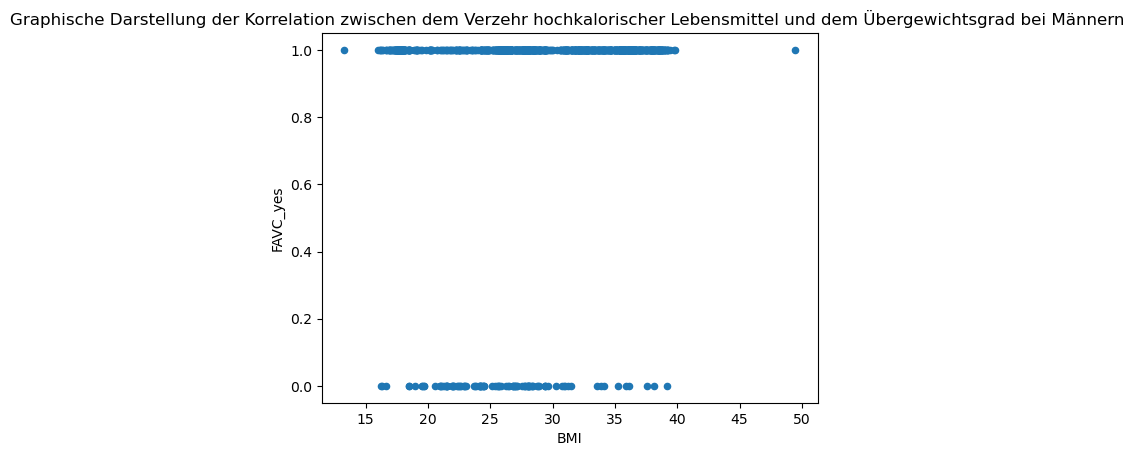

In [17]:
# Visualisierung der Korrelation für die erste Hypothese

data_men.plot(x='BMI',  y='FAVC_yes', kind='scatter', title='Graphische Darstellung der Korrelation zwischen dem Verzehr hochkalorischer Lebensmittel und dem Übergewichtsgrad bei Männern ')

plt.show()

Das Streudiagramm zeigt, dass Männer, die häufig hochkalorische Lebensmittel konsumieren (FAVC_yes = 1), tendenziell höhere BMI-Werte haben. Es ist zu beobachten, dass die meisten Datenpunkte für FAVC_yes = 1 über den gesamten Bereich der BMI-Werte verteilt sind, wobei eine größere Konzentration von Punkten im höheren BMI-Bereich (über 25) zu sehen ist. Dies unterstützt die Hypothese, dass der häufige Verzehr von hochkalorischen Lebensmitteln mit einem höheren BMI und somit einem höheren Risiko für Fettleibigkeit verbunden ist.


In [18]:
data_men[['BMI', 'CALC_encoded']].corr()

,BMI,CALC_encoded
BMI,1.000000,0.041047
CALC_encoded,0.041047,1.000000


Bei Männern besteht eine sehr geringe Korrelation zwischen Alkoholkonsum und BMI von 0,041047, was darauf hindeutet, dass der Alkoholkonsum kein bestimmender Faktor für den BMI bei Männern ist

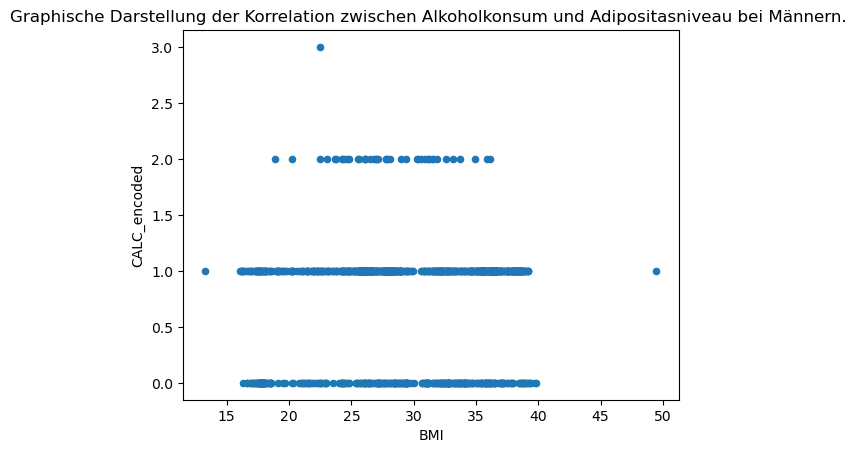

In [19]:
# Visualisierung der Korrelation für die erste Hypothese

data_men.plot(x='BMI',  y='CALC_encoded', kind='scatter', title='Graphische Darstellung der Korrelation zwischen Alkoholkonsum und Adipositasniveau bei Männern. ')

plt.show()



Die obige Visualisierung ist ein Streudiagramm, das die Beziehung zwischen dem BMI (Body Mass Index) und dem Alkoholkonsum (CALC_encoded) bei Männern darstellt.

Die X-Achse stellt den BMI dar.
Die Y-Achse zeigt den kodierten Wert für den Alkoholkonsum:
0 = Kein Alkoholkonsum
1 = Gelegentlich
2 = Häufig
3 = Immer

Das Streudiagramm zeigt, dass es keine eindeutige Korrelation zwischen dem Alkoholkonsum und dem BMI bei Männern gibt. Die Punkte sind über die verschiedenen Ebenen des Alkoholkonsums verstreut, ohne ein klares Muster zu zeigen. Dies deutet darauf hin, dass der Alkoholkonsum keinen signifikanten Einfluss auf den BMI und damit auf das Risiko für Fettleibigkeit bei Männern hat. Es gibt Männer mit hohen BMI-Werten in allen Kategorien des Alkoholkonsums, was die Hypothese, dass Alkoholkonsum einen direkten Einfluss auf Fettleibigkeit hat, nicht unterstützt.


**Korrelation Hypothese 2**

In [20]:
data_men[['BMI', 'family_history_with_overweight_yes']].corr()

,BMI,family_history_with_overweight_yes
BMI,1.000000,0.352622
family_history_with_overweight_yes,0.352622,1.000000


Bei Männern: Die Korrelation zwischen BMI und family_history_with_overweight_yes beträgt 0,352622. Eine Korrelation von 0,352622 deutet auf eine moderate positive Korrelation hin. Dies bedeutet, dass es eine signifikante Beziehung zwischen dem Vorhandensein familiärer Übergewichtsvorgeschichte und einem höheren BMI bei Männern gibt. Männer mit familiärer Übergewichtsvorgeschichte neigen dazu, einen höheren BMI zu haben.

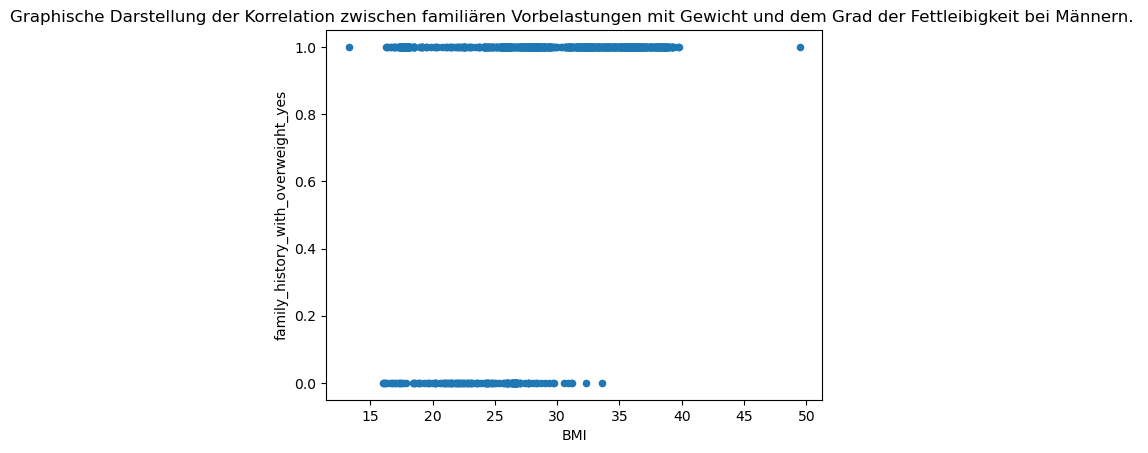

In [22]:
# Visualisierung der Korrelation für die zweite Hypothese

data_men.plot(x='BMI',  y='family_history_with_overweight_yes', kind='scatter', title='Graphische Darstellung der Korrelation zwischen familiären Vorbelastungen mit Gewicht und dem Grad der Fettleibigkeit bei Männern. ')

plt.show()

Erklärung: 

Die obige Visualisierung ist ein Streudiagramm, das die Beziehung zwischen dem BMI (Body Mass Index) und der familiären Vorgeschichte von Übergewicht (family_history_with_overweight_yes) bei Männern darstellt.

Die X-Achse stellt den BMI dar.
Die Y-Achse zeigt den binären Wert für die familiäre Vorgeschichte von Übergewicht:
0 = Keine familiäre Vorgeschichte von Übergewicht
1 = Familiäre Vorgeschichte von Übergewicht

Das Streudiagramm zeigt, dass Männer mit einer familiären Vorgeschichte von Übergewicht (family_history_with_overweight_yes = 1) tendenziell höhere BMI-Werte aufweisen. Die meisten Männer mit einer familiären Vorgeschichte von Übergewicht haben BMI-Werte im Bereich von 25 bis 35, während Männer ohne diese Vorgeschichte (family_history_with_overweight_yes = 0) eher niedrigere BMI-Werte haben. Dies unterstützt die Hypothese, dass eine familiäre Vorgeschichte von Übergewicht das Risiko für Fettleibigkeit erhöht.

**Korrelation Hypothese 3**

In [21]:
data_men[['BMI', 'CAEC_encoded']].corr()

,BMI,CAEC_encoded
BMI,1.000000,-0.199782
CAEC_encoded,-0.199782,1.000000


 Ein Korrelationskoeffizient von -0,199782 deutet auf eine schwache bis moderate negative Korrelation hin. Dies bedeutet, dass Männer, die häufiger zwischen den Mahlzeiten naschen, tendenziell einen leicht niedrigeren BMI haben. Allerdings ist diese Beziehung relativ schwach.

Dennoch könnte man das Naschen zwischen den Mahlzeiten nicht als einen Faktor betrachten, der das Gewicht beeinflusst, da auch die Häufigkeit des Verzehrs und die Konsistenz der verzehrten Lebensmittel sowie ihre Nährstoffzusammensetzung berücksichtigt werden müssten

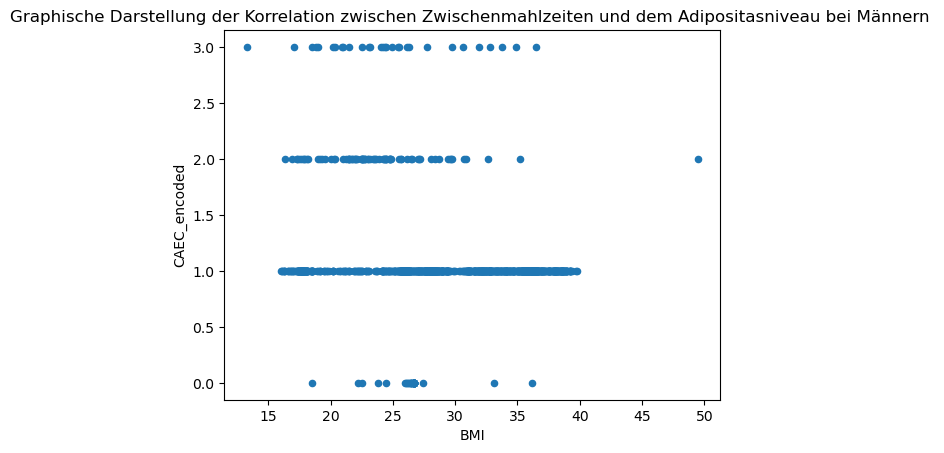

In [22]:
# Visualisierung der Korrelation für die dritte Hypothese

data_men.plot(x='BMI',  y='CAEC_encoded', kind='scatter', title='Graphische Darstellung der Korrelation zwischen Zwischenmahlzeiten und dem Adipositasniveau bei Männern ')

plt.show()

Die obige Visualisierung ist ein Streudiagramm, das die Beziehung zwischen dem BMI (Body Mass Index) und dem Naschen zwischen den Mahlzeiten (CAEC_encoded) bei Männern darstellt.

Die X-Achse stellt den BMI dar.
Die Y-Achse zeigt den kodierten Wert für das Naschen zwischen den Mahlzeiten:
0 = Nie
1 = Manchmal
2 = Häufig
3 = Immer


Das Streudiagramm zeigt, dass Männer, die manchmal, häufig oder immer zwischen den Mahlzeiten naschen (CAEC_encoded = 1, 2 oder 3), tendenziell höhere BMI-Werte aufweisen. Es gibt eine breitere Verteilung der BMI-Werte bei Männern, die häufiger naschen, was auf eine größere Variabilität innerhalb dieser Gruppe hinweist. Dies unterstützt die Hypothese, dass häufiges Naschen zwischen den Mahlzeiten mit einem höheren BMI und damit einem höheren Risiko für Fettleibigkeit verbunden ist.


**Korrelation Hypothese 4**

In [23]:
data_men[['BMI', 'TUE']].corr()

,BMI,TUE
BMI,1.000000,-0.116557
TUE,-0.116557,1.000000


Die Korrelation zwischen dem BMI und der Nutzung technologischer Geräte wie Smartphones, Computer, Fernseher und Videospielkonsolen ist so gering, nämlich -0,09972 bei Männern, dass sie keine signifikante Beziehung aufzeigt. Das bedeutet, dass die langfristige Nutzung technologischer Geräte keinen signifikanten Einfluss auf den BMI bei Männern in diesem Datensatz hat.

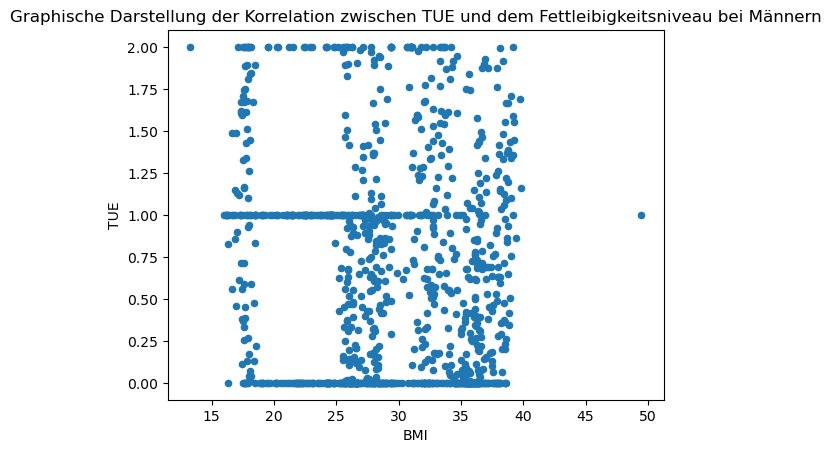

In [24]:
# Visualisierung der Korrelation für die vierte Hypothese

data_men.plot(x='BMI',  y='TUE', kind='scatter', title='Graphische Darstellung der Korrelation zwischen TUE und dem Fettleibigkeitsniveau bei Männern')

plt.show()

Die obige Visualisierung ist ein Streudiagramm, das die Beziehung zwischen dem BMI (Body Mass Index) und der Nutzung technologischer Geräte (TUE) bei Männern darstellt.

Die X-Achse stellt den BMI dar.
Die Y-Achse zeigt die tägliche Nutzung technologischer Geräte in Stunden (TUE).

Das Streudiagramm zeigt, dass es keine eindeutige Korrelation zwischen der Nutzung technologischer Geräte und dem BMI bei Männern gibt. Die Punkte sind über die verschiedenen Ebenen der technologischen Nutzung verstreut, ohne ein klares Muster zu zeigen. Dies deutet darauf hin, dass die Nutzung technologischer Geräte keinen signifikanten Einfluss auf den BMI und damit auf das Risiko für Fettleibigkeit bei Männern hat. Es gibt Männer mit hohen BMI-Werten bei allen Nutzungsstufen, was die Hypothese, dass eine höhere Nutzung technologischer Geräte mit einem höheren BMI korreliert, nicht unterstützt.

# Modelle und Prognose


# Train-Test Split
Wir teilen die Daten in Trainings- und Testdaten auf. Die Trainingsdaten werden verwendet, um das Modell zu trainieren, während die Testdaten verwendet werden, um die Leistung des Modells  zu evaluieren.

Das Modul `train_test_split` aus `sklearn.model_selection` wird verwendet, um die Daten aufzuteilen.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Die Korrelation hat uns gezeigt, dass einige vorhersagende Variablen keinen signifikanten Einfluss auf das Fettleibigkeitsniveau von Männern haben.

Das Ziel unserer Studie, die darauf abzielt, Algorithmen zu trainieren, die bessere Prognosen über das Fettleibigkeitsniveau von Männern (BMI) bieten können, besteht daher darin, nur die vorhersagenden Variablen zu verwenden, für die eine Korrelation besteht. Diejenigen, die keine Korrelation aufweisen, werden daher ausgeschlossen

In [25]:
#Separation der Daten in Trainingsdaten und Testdaten.

X_men = data_men.drop(columns=['BMI', 'NObeyesdad','TUE','CAEC_encoded','CALC','CAEC'])

y_men = data_men['BMI']

Wir haben shon die metrische Form einiger predictiven Variablen, deswegen sind ihre entsprechenden Kategorische Form ausgeschlossem worden

In [26]:
X_men

,Height,Weight,family_history_with_overweight_yes,FAVC_yes,CALC_encoded
2,1.800000,77.000000,1,0,2
3,1.800000,87.000000,0,0,2
4,1.780000,89.800000,0,0,1
5,1.620000,53.000000,0,1,1
7,1.640000,53.000000,0,0,1
...,...,...,...,...,...
1794,1.653876,102.583895,1,1,0
1795,1.657132,105.580491,1,1,0
1796,1.644751,101.067988,1,1,0
1797,1.660761,104.321463,1,1,0


In [27]:
X_men_train, X_men_test, y_men_train, y_men_test = train_test_split(
    X_men, y_men, test_size=0.3, random_state=42, ) 

print(f"X_train: {X_men_train.shape}")
print(f"y_train: {y_men_train.shape}")
print(f"X_test: {X_men_test.shape}")
print(f"y_test: {y_men_test.shape}")

X_train: (747, 5)
y_train: (747,)
X_test: (321, 5)
y_test: (321,)


# OLS Regression

Im Folgenden werden wir eine OLS Regression durchführen. Dies dient als Referenzpunkt für die Regularisierungsverfahren, die wir später anwenden werden.

Für das Training des Modells verwenden wir den sog. Trainingsdatensatz, also `y_train` and `X_train`. Sobald die $\beta$-Koeffizienten geschätzt wurden, versuchen wir die Prognoseleistung des Modells zu evaluieren. Dies geschieht auf Basis des Testdatensatzes, also $\tilde{X}$ (bzw. `X\_test`). Die Prognose sind definiert als $\hat y = \tilde{X} \hat \beta$. Die Prognosefehler sind dann gegeben durch $\hat e = \hat y - \tilde{y}$.

In [28]:
# Run OLS regression on training data
# Erstellen eines linearen Regressionsobjekts 

FIT_INTERCEPT = True

ModelOls = LinearRegression(fit_intercept=FIT_INTERCEPT)
ModelOls.fit(X_men_train, y_men_train)

print("Coefficients: \n", ModelOls.coef_)

Coefficients: 
 [-32.63057911   0.31904112   0.27619228   0.08858039  -0.2601565 ]


In [29]:

from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
# Definieren von Regressionsmodellen

models = {
    "RandomForestRegressor": RandomForestRegressor(),
    "LGBMRegressor": LGBMRegressor(verbose=-1),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
}

# Training und Evaluation von Regressionsmodelle
for model_name, model in models.items():
    model.fit(X_men_train, y_men_train)
    predictions = model.predict(X_men_test)
    
    mse = mean_squared_error(y_men_test, predictions)
    mae = mean_absolute_error(y_men_test, predictions)
    r2 = r2_score(y_men_test, predictions)
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")

    
    # Berechnen Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_men_test - predictions) / y_men_test)) * 100
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    
    print("=" * 50)

Model: RandomForestRegressor
Mean Squared Error: 0.66
Mean Absolute Error: 0.25
R-squared: 0.98
Mean Absolute Percentage Error (MAPE): 0.86%
Model: LGBMRegressor
Mean Squared Error: 0.65
Mean Absolute Error: 0.27
R-squared: 0.98
Mean Absolute Percentage Error (MAPE): 0.93%
Model: DecisionTreeRegressor
Mean Squared Error: 0.78
Mean Absolute Error: 0.37
R-squared: 0.98
Mean Absolute Percentage Error (MAPE): 1.28%
Model: ExtraTreesRegressor
Mean Squared Error: 0.57
Mean Absolute Error: 0.16
R-squared: 0.99
Mean Absolute Percentage Error (MAPE): 0.52%


# MODEL SELECTION

Kriterien für die Auswahl:

Mean Squared Error (MSE): Je niedriger dieser Wert ist, desto besser ist das Modell.
Mean Absolute Error (MAE): Ebenso, je niedriger dieser Wert ist, desto besser ist das Modell.
R-squared (R²): Je näher dieser Wert an 1 liegt, desto besser ist das Modell.
Mean Absolute Percentage Error (MAPE): Je niedriger dieser Wert ist, desto besser ist das Modell.

Vergleichsanalyse:

Analyse der Ergebnisse für jedes Modell
1. **RandomForestRegressor**
Mittlerer quadratischer Fehler (MSE): 0,66 zeigt an, dass die Fehler der Vorhersagen moderat niedrig sind und das Modell daher vernünftig genaue Vorhersagen macht.

Mean Absolute Error (MAE): 0,24 ist ziemlich niedrig, was bedeutet, dass die Vorhersagen im Durchschnitt um 0,25 Einheiten von den tatsächlichen Werten abweichen.

Bestimmtheitsmaß (R-squared): 0,98 ist sehr hoch und deutet darauf hin, dass das Modell 98% der Varianz der Daten erklärt, was ein ausgezeichneter Indikator für die Qualität der Vorhersagen ist.

Mean Absolute Percentage Error (MAPE): 0,82% zeigt, dass die Vorhersagen des Modells in Bezug auf den Prozentsatz sehr nahe an den tatsächlichen Werten liegen, was für Anwendungen, bei denen die relative Genauigkeit wichtig ist, ausgezeichnet ist.

**Fazit**: Der RandomForestRegressor ist sehr leistungsfähig mit niedrigen mittleren Fehlern und einer großen Fähigkeit, die Datenvarianz zu erklären. Er ist zuverlässig für präzise und konsistente Vorhersagen.

2. **LGBMRegressor**
Mittlerer quadratischer Fehler (MSE): 0,65 ist etwas besser als der des RandomForestRegressor und zeigt leicht niedrigere Fehler an.

Mean Absolute Error (MAE): 0,27 ist etwas höher, was bedeutet, dass die Vorhersagen etwas weniger genau sind als die des RandomForestRegressor in absoluten Zahlen. 

Bestimmtheitsmaß (R-squared): 0,98 erklärt auch dieses Modell 98% der Varianz der Daten.

Mean Absolute Percentage Error (MAPE): 0,93%

Der MAPE von 0,93% ist etwas höher und deutet auf etwas weniger genaue Vorhersagen in Prozent hin.

**Fazit**: Der LGBMRegressor ist ebenfalls sehr leistungsfähig mit einem etwas besseren MSE als der RandomForestRegressor, aber etwas höheren MAE und MAPE. Es bleibt ein zuverlässiges Modell mit guter Vorhersagefähigkeit.

3. **DecisionTreeRegressor**
Mittlerer quadratischer Fehler (MSE): 0,84 ist höher als bei den anderen Modellen und deutet auf weniger genaue Vorhersagen in Bezug auf quadratische Fehler hin
.
Mean Absolute Error (MAE): 0,38 ist ebenfalls höher und deutet auf weniger genaue Vorhersagen in absoluten Zahlen hin.

Bestimmtheitsmaß (R-squared): 0,98 ähnlich wie bei den anderen Modellen, zeigen die anderen Metriken eine geringere Leistung.

Mean Absolute Percentage Error (MAPE): 1,31% .Ein MAPE von 1,28% ist der höchste unter den Modellen und deutet auf größere prozentuale Fehler hin.

**Fazit**: Der DecisionTreeRegressor ist das leistungsschwächste der bewerteten Modelle mit höheren mittleren Fehlern und insgesamt geringerer Genauigkeit. Es bleibt jedoch ein nützliches, aber weniger effektives Modell als die anderen.

4. **ExtraTreesRegressor**
Mittlerer quadratischer Fehler (MSE): 0,58 ist der niedrigste und zeigt sehr geringe Fehler und daher sehr genaue Vorhersagen an.

Mean Absolute Error (MAE): 0,16 hat den niedrigsten durchschnittlichen absoluten Fehler und deutet auf sehr genaue Vorhersagen hin.
Bestimmtheitsmaß (R-squared): 0,99 bedeutet, dass dieses Modell 99% der Varianz der Daten erklärt, was ausgezeichnet ist.

Mean Absolute Percentage Error (MAPE): 0,52% ist der niedrigste und deutet auf minimale prozentuale Fehler hin.

**Fazit**: Der ExtraTreesRegressor ist das leistungsfähigste Modell unter den bewerteten, mit den besten Metriken in allen Kategorien. Es bietet äußerst genaue Vorhersagen mit minimalen Fehlern.


Nach einer eingehenden Analyse jedes Modells sind die beiden besten Modelle:

**ExtraTreesRegressor**: Es glänzt in allen Metriken mit dem niedrigsten MSE, MAE und MAPE sowie einem R-Quadrat von 0,99. Dieses Modell ist am genauesten und zuverlässigsten.

**RandomForestRegressor**: Obwohl etwas schlechter als der ExtraTreesRegressor, zeigt dieses Modell sehr solide Leistungen mit Metriken, die denen des ExtraTreesRegressor sehr nahe kommen. Es ist zuverlässig und genau für hochwertige Vorhersagen.

Daher empfehlen wir den **ExtraTreesRegressor** als bestes Modell basierend auf den angegebenen Bewertungskriterien 





**Wichtige Bemerkung:  je mehr die Algorithmen trainiert werden, oder je mehr Sie das Programm ausführen, desto mehr ändert sich die Ergebnisse. Die Ergebnisse, die auf den Fazit erwähnt worden sind, entsprechend nur das erste Trainieren un könnte je nach Trainieren ändern**






Angesicht der Tatsache , dass wir  die Regression- Modelle und nicht klassifikation-Modelle verwendet haben, lässt sich schwierig , eine Confusion matrix zu erstellen. 

Nichtsdestotrozt werden wir versuchen, die Performance der verschiedenen Modelle Grafisch darzustellen und am Ende die beste Modelle auswählen

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 747, number of used features: 5
[LightGBM] [Info] Start training from score 29.511599
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

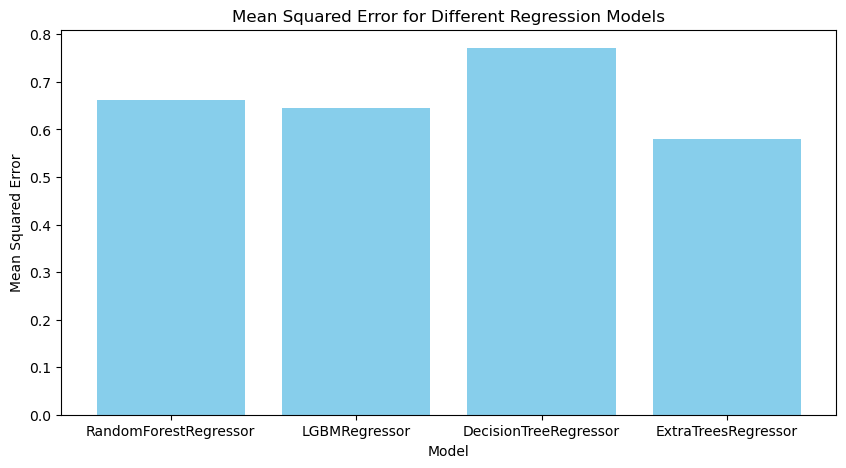

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Definieren der Modelle
models = {
    "RandomForestRegressor": RandomForestRegressor(),
    "LGBMRegressor": LGBMRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor()
}

# Dictionary zum Speichern von Leistungsmetriken
performance_metrics = {}

# Schleife über jedes Modell und Auswertung seiner Leistung
for model_name, model in models.items():
    # Das Modell anpassen
    model.fit(X_men_train, y_men_train)
    
    # Vorhersagen
    y_men_pred = model.predict(X_men_test)
    
    # Berechnen der Leistungsmetriken
    mse = mean_squared_error(y_men_test, y_men_pred)
    mae = mean_absolute_error(y_men_test, y_men_pred)
    r2 = r2_score(y_men_test, y_men_pred)
    
    # Metriken im Dictionary speichern
    performance_metrics[model_name] = {"MSE": mse, "MAE": mae, "R-squared": r2}

    # Leistungsmetriken anzeigen und plotten
for model_name, metrics in performance_metrics.items():
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {metrics['MSE']:.2f}")
    print(f"Mean Absolute Error: {metrics['MAE']:.2f}")
    print(f"R-squared: {metrics['R-squared']:.2f}")
    print("=" * 50)

# MSE für jedes Modell plotten
plt.figure(figsize=(10, 5))
model_names = list(performance_metrics.keys())
mse_values = [metrics["MSE"] for metrics in performance_metrics.values()]
plt.bar(model_names, mse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Different Regression Models')
plt.show()



Auf diesem Diagramm sind die verschiedenen Modelle sowie deren mittlere quadratische Fehler (Mean Squared Error) dargestellt. Wir stellen fest, dass das Modell, das mit sehr geringer Fehlerquote prognostiziert, der ExtraTreesRegressor ist, mit einem Wert von etwa 0,58, gefolgt vom RandomForestRegressor und LGBMRegressor mit etwa 0,66 und 0,64. Das Modell DecisionTreeRegressor weist einen wesentlich höheren mittleren quadratischen Fehler auf, nämlich 0,84.

**ENTSCHEIDUNG**
Unter Berücksichtung unserer Analyse treffen wir die Entscheidung, die ExtraTreesRegressor- Modelle als beste Modelle für Prognose der Fettleibigkeit bei **Männern** auszuwählen.

# TEIL 2 - UNTERSUCHUNG MIT FRAUEN

In diesem Teil beschäftigen wir jetzt mit Frauen. Vielleicht, wird etwas anders erscheinen...

In [32]:
data_women

,Height,Weight,CALC,FAVC,family_history_with_overweight,TUE,CAEC,NObeyesdad,BMI
0,1.620000,64.000000,no,no,yes,1.000000,Sometimes,Normal_Weight,24.386526
1,1.520000,56.000000,Sometimes,no,yes,0.000000,Sometimes,Normal_Weight,24.238227
6,1.500000,55.000000,Sometimes,yes,yes,0.000000,Sometimes,Normal_Weight,24.444444
11,1.720000,80.000000,Sometimes,yes,yes,1.000000,Frequently,Overweight_Level_II,27.041644
15,1.700000,66.000000,Sometimes,no,yes,1.000000,Always,Normal_Weight,22.837370
...,...,...,...,...,...,...,...,...,...
2106,1.710730,131.408528,Sometimes,yes,yes,0.906247,Sometimes,Obesity_Type_III,44.901475
2107,1.748584,133.742943,Sometimes,yes,yes,0.599270,Sometimes,Obesity_Type_III,43.741923
2108,1.752206,133.689352,Sometimes,yes,yes,0.646288,Sometimes,Obesity_Type_III,43.543817
2109,1.739450,133.346641,Sometimes,yes,yes,0.586035,Sometimes,Obesity_Type_III,44.071535



**Untersuchung der erste Hypothese = Ernährung und Alcohol  hätten einen Einfluss auf die Fettleibigkeit.**

In [33]:
# Alcohol und Einfluss auf die Fettlebigkeit

def count_by_as_str(arr, value):
    return (arr == value).sum()

(data_women.groupby(data_women['NObeyesdad']).aggregate(
    Always=pd.NamedAgg('CALC', lambda arr : count_by_as_str(arr, 'Always')),
    Frequently=pd.NamedAgg('CALC', lambda arr : count_by_as_str(arr, 'Frequently')),
    Sometimes=pd.NamedAgg('CALC', lambda arr : count_by_as_str(arr, 'Sometimes')),
    No=pd.NamedAgg('CALC', lambda arr : count_by_as_str(arr, 'no'))))

,Always,Frequently,Sometimes,No
NObeyesdad,,,,
Insufficient_Weight,0,1,107,65
Normal_Weight,0,7,72,62
Obesity_Type_I,0,1,77,78
Obesity_Type_II,0,0,1,1
Obesity_Type_III,0,0,322,1
Overweight_Level_I,0,9,110,26
Overweight_Level_II,0,10,22,71


Die Ergebnisse zeigen, dass Gelegentlicher Alkoholkonsum ist die häufigste Konsumform bei Frauen in allen Gewichtskategorien, besonders ausgeprägt bei Frauen mit Adipositas (Fettleibigkeit) Typ III. Häufiger Alkoholkonsum ist relativ selten und fehlt völlig bei Frauen mit Adipositas Typ II und III,  was möglicherweise bedeuten kann, dass der häufige alkoholkonsum kein Faktor mit hohem Einfluss auf das Gewicht bei Frauen ist. Alkoholabstinenz ist weit verbreitet, besonders bei Frauen mit Untergewicht, Adipositas Typ I und Übergewicht Level II.

In [34]:
#Häufiger Konsum von kalorienreichen Lebensmitteln und Einfluss auf die Fettlebigkeit

def count_by_as_str(arr, value):
    return (arr == value).sum()

(data_women.groupby(data_women['NObeyesdad'])[['FAVC']]
.agg(lambda arr: count_by_as_str(arr, 'yes')))

,FAVC
NObeyesdad,
Insufficient_Weight,125
Normal_Weight,107
Obesity_Type_I,154
Obesity_Type_II,1
Obesity_Type_III,322
Overweight_Level_I,134
Overweight_Level_II,57


Die Ergebnisse zeigen, dass der häufige Konsum von kalorienreichen Lebensmitteln bei Frauen mit verschiedenen Gewichtskategorien stark variiert. Insbesondere Frauen mit Adipositas Typ III konsumieren diese Art von Lebensmitteln am häufigsten, gefolgt von Frauen mit Adipositas Typ I und Übergewicht Level I. Der Konsum ist bei Frauen mit normalem Gewicht und unzureichendem Gewicht ebenfalls bedeutend, jedoch geringer. Nur eine Frau mit Adipositas Typ II gibt an, häufig kalorienreiche Lebensmittel zu essen.


**Family_history_with_overweight	Vs NObeyesdad (Obesity level)**

Hypothese 2 : Menschen mit einer familiären Vorgeschichte von Übergewicht hätten ein signifikant höheres Risiko, selbst fettleibig zu werden

In [35]:
(data_women.groupby(data_women['NObeyesdad']).aggregate(

    Yes=pd.NamedAgg('family_history_with_overweight', lambda arr : count_by_as_str(arr, 'yes')),
    No=pd.NamedAgg('family_history_with_overweight', lambda arr : count_by_as_str(arr, 'no'))))

,Yes,No
NObeyesdad,,
Insufficient_Weight,44,129
Normal_Weight,76,65
Obesity_Type_I,155,1
Obesity_Type_II,1,1
Obesity_Type_III,323,0
Overweight_Level_I,111,34
Overweight_Level_II,101,2


Die Ergebnisse zeigen, dass es eine starke Assoziation zwischen einer familiären Vorgeschichte von Übergewicht und dem Risiko, selbst übergewichtig oder fettleibig zu werden, gibt. Insbesondere:

Obesity Type I und Obesity Type III: Der Großteil der Frauen in diesen Kategorien hat eine familiäre Vorgeschichte von Übergewicht (155 bzw. 323 Frauen). Sehr wenige oder keine Frauen in diesen Kategorien haben keine familiäre Vorgeschichte.
Overweight Level I und II: Auch hier ist die Mehrheit der Frauen in diesen Kategorien von einer familiären Vorgeschichte von Übergewicht betroffen (111 bzw. 101 Frauen).
Normal Weight und Insufficient Weight: Frauen in diesen Kategorien zeigen eine ausgeglichenere Verteilung zwischen einer familiären Vorgeschichte und keiner familiären Vorgeschichte von Übergewicht, obwohl auch hier eine größere Anzahl von Frauen mit Normalgewicht eine familiäre Vorgeschichte hat.

**Naschen zwischen Mahlzeiten (CAEC) Vs NObeyesdad (Obesity level)**

Hypothese 3 : Personen, die häufig zwischen den Mahlzeiten naschen, haben ein höheres Risiko, übergewichtig oder fettleibig zu werden ( CAEC UND OBESITY)

In [36]:
(data_women.groupby(data_women['NObeyesdad']).aggregate(
    Always=pd.NamedAgg('CAEC', lambda arr : count_by_as_str(arr, 'Always')),
    Frequently=pd.NamedAgg('CAEC', lambda arr : count_by_as_str(arr, 'Frequently')),
    Sometimes=pd.NamedAgg('CAEC', lambda arr : count_by_as_str(arr, 'Sometimes')),
    No=pd.NamedAgg('CAEC', lambda arr : count_by_as_str(arr, 'no'))))

,Always,Frequently,Sometimes,No
NObeyesdad,,,,
Insufficient_Weight,0,110,60,3
Normal_Weight,19,34,83,5
Obesity_Type_I,1,3,152,0
Obesity_Type_II,1,0,1,0
Obesity_Type_III,0,0,323,0
Overweight_Level_I,1,8,129,7
Overweight_Level_II,1,6,96,0


Die Ergebnisse zeigen, dass das Naschen zwischen den Mahlzeiten in allen Gewichtskategorien verbreitet ist, jedoch variieren die Häufigkeiten. Die größte Anzahl von Frauen in allen Kategorien mit Übergewicht oder Adipositas naschen "manchmal". Dies deutet darauf hin, dass es ein verbreitetes Verhalten ist, unabhängig vom Gewicht.

- Gelegentliches Naschen (manchmal) ist besonders häufig bei Frauen mit höheren BMI-Werten (Adipositas Typ I, II, und III).
- Häufiges Naschen und immer Naschen sind in allen Kategorien weniger verbreitet.
- Nie Naschen ist selten, besonders bei Frauen mit Übergewicht oder Adipositas.

Dies könnte darauf hinweisen, dass das gelegentliche Naschen ein gemeinsames Verhalten ist, das über die Gewichtskategorien hinweg auftritt, und möglicherweise ein Beitrag zur Gewichtszunahme und zur Adipositas ist.

**Nutzung technologischer Geräte (TUE) Vs NObeyesdad (Obesity level)**

Hypothese 4 :  Personen, die stark von der Nutzung technologischer Geräte wie Smartphones, Computer, Fernseher und Videospielkonsolen abhängig sind, haben ein höheres Risiko, übergewichtig oder fettleibig zu werden.

In [37]:
def average_hours(arr):
    return arr.mean()

# Groupement des données par catégories de poids (NObeyesdad) et calcul de la moyenne des heures TUE
time = (data_women.groupby(data_women['NObeyesdad'])[['TUE']]
          .agg(average_hours)
          .reset_index())
time

,NObeyesdad,TUE
0,Insufficient_Weight,0.732919
1,Normal_Weight,0.673759
2,Obesity_Type_I,0.469888
3,Obesity_Type_II,1.000000
4,Obesity_Type_III,0.603399
5,Overweight_Level_I,0.707934
6,Overweight_Level_II,0.780702


Die Ergebnisse zeigen, dass es keine klare, direkte Korrelation zwischen der Nutzungsdauer technologischer Geräte und dem Grad der Fettleibigkeit gibt. Zwar zeigt die Gruppe mit Adipositas Typ II die höchste durchschnittliche Nutzungsdauer, jedoch haben andere Gruppen mit ähnlichen oder höheren BMI-Werten (wie Adipositas Typ III und Übergewicht Stufe II) eine geringere Nutzungsdauer.

- Höchste Nutzung: Adipositas Typ II (1 Stunde pro Tag).
- Geringste Nutzung: Adipositas Typ I (0,47 Stunden pro Tag).

Diese Ergebnisse deuten darauf hin, dass es möglicherweise andere Faktoren gibt, die den Zusammenhang zwischen der Nutzung technologischer Geräte und der Fettleibigkeit beeinflussen. Weitere Untersuchungen wären notwendig, um diese Zusammenhänge besser zu verstehen.

# KORRELATION

## Vorbereitung der Features

### Definiere die Zielvariable
Wir definieren an dieser Stelle die Zielvariable -- unser `y`

Hier unsere Zielvariable 'y' ist 'BMI', das ist der BMI Body Mass Index für jede Person. Sie ist in der Tat die numerische und konventionelle Repräsentation der Variablen NObeyesdad, die kategorischer Natur ist.

In [38]:
TARGET_NAME = "BMI"
y_women = data_women[TARGET_NAME]  # Pandas series
y_women.head()

0     24.386526
1     24.238227
6     24.444444
11    27.041644
15    22.837370
Name: BMI, dtype: float64

In [39]:
data_women

,Height,Weight,CALC,FAVC,family_history_with_overweight,TUE,CAEC,NObeyesdad,BMI
0,1.620000,64.000000,no,no,yes,1.000000,Sometimes,Normal_Weight,24.386526
1,1.520000,56.000000,Sometimes,no,yes,0.000000,Sometimes,Normal_Weight,24.238227
6,1.500000,55.000000,Sometimes,yes,yes,0.000000,Sometimes,Normal_Weight,24.444444
11,1.720000,80.000000,Sometimes,yes,yes,1.000000,Frequently,Overweight_Level_II,27.041644
15,1.700000,66.000000,Sometimes,no,yes,1.000000,Always,Normal_Weight,22.837370
...,...,...,...,...,...,...,...,...,...
2106,1.710730,131.408528,Sometimes,yes,yes,0.906247,Sometimes,Obesity_Type_III,44.901475
2107,1.748584,133.742943,Sometimes,yes,yes,0.599270,Sometimes,Obesity_Type_III,43.741923
2108,1.752206,133.689352,Sometimes,yes,yes,0.646288,Sometimes,Obesity_Type_III,43.543817
2109,1.739450,133.346641,Sometimes,yes,yes,0.586035,Sometimes,Obesity_Type_III,44.071535


In [40]:
print('Values of CAEC : ', data_men['CAEC'].unique())        
print('Values of CALC : ', data_men['CALC'].unique())    
print('Values of CAEC : ', data_men['CAEC'].unique())

Values of CAEC :  ['Sometimes' 'Frequently' 'no' 'Always']
Values of CALC :  ['Frequently' 'Sometimes' 'no' 'Always']
Values of CAEC :  ['Sometimes' 'Frequently' 'no' 'Always']


#### One-Hot-Encoding
Einige der Variablen, die wir brauchen, sind kategorisch. Wir werden dann diese in numerische Variablen mit One-Hot-Codierung umwandeln.

In [41]:
COLUMNS_TO_OHE = ['family_history_with_overweight', 'FAVC']

data_women_dummies = pd.get_dummies(data_women[COLUMNS_TO_OHE], drop_first=True)

# Cast boolean to int
data_women_dummies = data_women_dummies.astype(int)

 
 
#Quellspalten löschen
data_women.drop(columns=COLUMNS_TO_OHE, inplace=True)

# Verkettung des ursprünglichen DataFrame mit den transformierten Spalten
data_women = pd.concat([data_women, data_women_dummies], axis=1)

data_women_dummies.dtypes

data_women_dummies.head()

,family_history_with_overweight_yes,FAVC_yes
0,1,0
1,1,0
6,1,1
11,1,1
15,1,0


Erste Kodierung abgeschlossen!

In [42]:
data_women

,Height,Weight,CALC,TUE,CAEC,NObeyesdad,BMI,family_history_with_overweight_yes,FAVC_yes
0,1.620000,64.000000,no,1.000000,Sometimes,Normal_Weight,24.386526,1,0
1,1.520000,56.000000,Sometimes,0.000000,Sometimes,Normal_Weight,24.238227,1,0
6,1.500000,55.000000,Sometimes,0.000000,Sometimes,Normal_Weight,24.444444,1,1
11,1.720000,80.000000,Sometimes,1.000000,Frequently,Overweight_Level_II,27.041644,1,1
15,1.700000,66.000000,Sometimes,1.000000,Always,Normal_Weight,22.837370,1,0
...,...,...,...,...,...,...,...,...,...
2106,1.710730,131.408528,Sometimes,0.906247,Sometimes,Obesity_Type_III,44.901475,1,1
2107,1.748584,133.742943,Sometimes,0.599270,Sometimes,Obesity_Type_III,43.741923,1,1
2108,1.752206,133.689352,Sometimes,0.646288,Sometimes,Obesity_Type_III,43.543817,1,1
2109,1.739450,133.346641,Sometimes,0.586035,Sometimes,Obesity_Type_III,44.071535,1,1


In [43]:
# Ordinale Kodierung
encoding = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
data_women['CALC_encoded'] = df['CALC'].map(encoding)
data_women['CAEC_encoded'] = df['CAEC'].map(encoding)

data_women

,Height,Weight,CALC,TUE,CAEC,NObeyesdad,BMI,family_history_with_overweight_yes,FAVC_yes,CALC_encoded,CAEC_encoded
0,1.620000,64.000000,no,1.000000,Sometimes,Normal_Weight,24.386526,1,0,0,1
1,1.520000,56.000000,Sometimes,0.000000,Sometimes,Normal_Weight,24.238227,1,0,1,1
6,1.500000,55.000000,Sometimes,0.000000,Sometimes,Normal_Weight,24.444444,1,1,1,1
11,1.720000,80.000000,Sometimes,1.000000,Frequently,Overweight_Level_II,27.041644,1,1,1,2
15,1.700000,66.000000,Sometimes,1.000000,Always,Normal_Weight,22.837370,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
2106,1.710730,131.408528,Sometimes,0.906247,Sometimes,Obesity_Type_III,44.901475,1,1,1,1
2107,1.748584,133.742943,Sometimes,0.599270,Sometimes,Obesity_Type_III,43.741923,1,1,1,1
2108,1.752206,133.689352,Sometimes,0.646288,Sometimes,Obesity_Type_III,43.543817,1,1,1,1
2109,1.739450,133.346641,Sometimes,0.586035,Sometimes,Obesity_Type_III,44.071535,1,1,1,1


Zweite Kodierung abgeschlossen!

**Korrelation Hypothese 1**

In [44]:
data_women[['BMI', 'FAVC_yes']].corr()

,BMI,FAVC_yes
BMI,1.000000,0.293861
FAVC_yes,0.293861,1.000000


Die Ergebnisse zeigen, dass Frauen, die häufig kalorienreiche Lebensmittel konsumieren, tendenziell einen höheren BMI haben. Dies deutet darauf hin, dass der Konsum kalorienreicher Lebensmittel möglicherweise ein Risikofaktor für Fettleibigkeit ist. Allerdings ist die Korrelation nicht sehr stark (nur etwa 0.29), was darauf hinweist, dass es viele andere Faktoren gibt, die den BMI beeinflussen können. Die Streuung der Daten zeigt, dass sowohl Frauen mit niedrigem als auch hohem BMI kalorienreiche Lebensmittel konsumieren können, was die Vielschichtigkeit und Komplexität von Fettleibigkeit und ihren Ursachen unterstreicht.

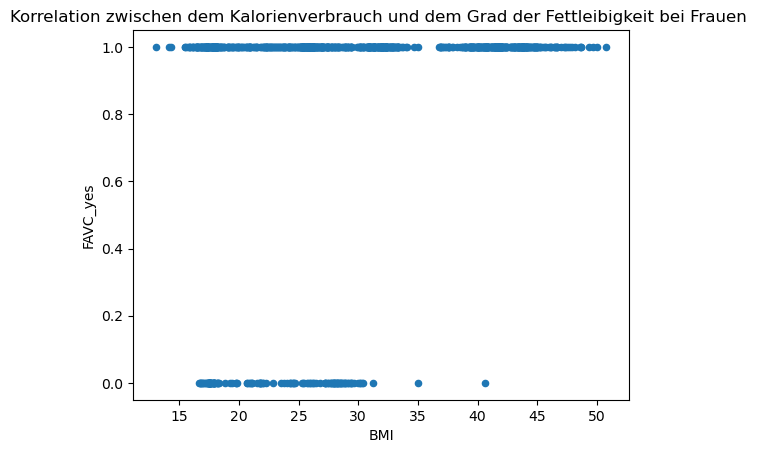

In [45]:
# Visualisierung der Korrelation für die erste Hypothese

data_women.plot(x='BMI',  y='FAVC_yes', kind='scatter', title='Korrelation zwischen dem Kalorienverbrauch und dem Grad der Fettleibigkeit bei Frauen ')

plt.show()

Erklärung

Die obige Visualisierung ist ein Streudiagramm, das die Beziehung zwischen dem BMI (Body Mass Index) und dem häufigen Verzehr von hochkalorischen Lebensmitteln (FAVC_yes) bei Frauen darstellt.

Die X-Achse stellt den BMI dar.
Die Y-Achse zeigt den binären Wert für den häufigen Verzehr von hochkalorischen Lebensmitteln:
0 = Kein häufiger Verzehr
1 = Häufiger Verzehr

Fazit

Das Streudiagramm zeigt, dass Frauen, die häufig hochkalorische Lebensmittel konsumieren (FAVC_yes = 1), tendenziell höhere BMI-Werte aufweisen. Es ist eine klare Trennung zwischen den Gruppen mit FAVC_yes = 0 und FAVC_yes = 1 zu sehen, wobei letztere Gruppe tendenziell höhere BMI-Werte hat. Dies unterstützt die Hypothese, dass der häufige Verzehr von hochkalorischen Lebensmitteln mit einem höheren BMI und somit einem höheren Risiko für Fettleibigkeit verbunden ist. Der Median-BMI in der Gruppe mit häufigem Verzehr hochkalorischer Lebensmittel ist höher, was auf eine starke positive Beziehung hinweist.

In [46]:
data_women[['BMI', 'CALC_encoded']].corr()

,BMI,CALC_encoded
BMI,1.000000,0.272052
CALC_encoded,0.272052,1.000000


Diese Korrelation deutet auf eine mäßig positive Beziehung zwischen dem Body-Mass-Index (BMI) und Alkoholkonsum hin. Ein Korrelationskoeffizient von 0,27 legt nahe, dass eine Zunahme des Body-Mass-Index mit einer Zunahme von Alkoholkonsum verbunden ist, und umgekehrt, aber diese Beziehung ist nicht sehr stark. Mit anderen Worten, die beiden Variablen zeigen eine gewisse Übereinstimmung in ihrer Variation, aber sie sind nicht stark miteinander verbunden.

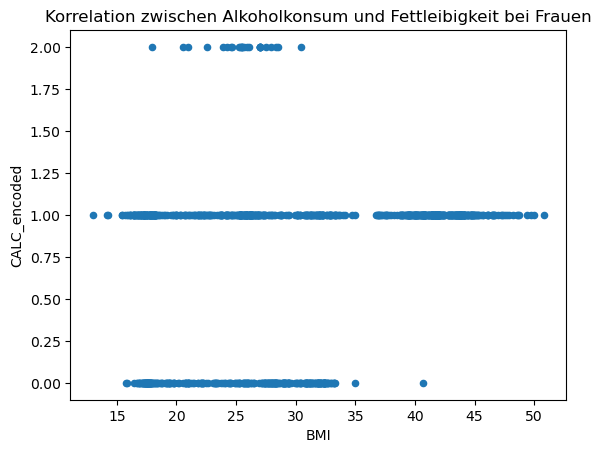

In [47]:
# Visualisierung der Korrelation für die erste Hypothese

data_women.plot(x='BMI',  y='CALC_encoded', kind='scatter', title='Korrelation zwischen Alkoholkonsum und Fettleibigkeit bei Frauen')

plt.show()

Erklärung

Die obige Visualisierung ist ein Streudiagramm, das die Beziehung zwischen dem BMI (Body Mass Index) und dem Alkoholkonsum (CALC_encoded) bei Frauen darstellt.

Die X-Achse stellt den BMI dar.
Die Y-Achse zeigt den kodierten Wert für den Alkoholkonsum:
0 = Kein Alkoholkonsum
1 = Gelegentlich
2 = Häufig
3 = Immer

Fazit

Das Streudiagramm zeigt, dass es keine eindeutige Korrelation zwischen dem Alkoholkonsum und dem BMI bei Frauen gibt. Die Punkte sind über die verschiedenen Ebenen des Alkoholkonsums verstreut, ohne ein klares Muster zu zeigen. Dies deutet darauf hin, dass der Alkoholkonsum keinen signifikanten Einfluss auf den BMI und damit auf das Risiko für Fettleibigkeit bei Frauen hat. Es gibt Frauen mit hohen BMI-Werten in allen Kategorien des Alkoholkonsums, was die Hypothese, dass Alkoholkonsum einen direkten Einfluss auf Fettleibigkeit hat, nicht unterstützt. Der Median-BMI zeigt keine klare Tendenz in Bezug auf den Alkoholkonsum.

**Korrelation Hypothese 2**

In [48]:
data_women[['BMI', 'family_history_with_overweight_yes']].corr()

,BMI,family_history_with_overweight_yes
BMI,1.000000,0.577978
family_history_with_overweight_yes,0.577978,1.000000


Diese Korrelation deutet auf eine mäßig positive Beziehung zwischen dem Body-Mass-Index (BMI) und dem Vorhandensein einer familiären Vorgeschichte von Übergewicht hin. Ein Korrelationskoeffizient von 0,58 deutet darauf hin, dass ein höherer BMI mit einer höheren Wahrscheinlichkeit für das Vorliegen einer familiären Vorgeschichte von Übergewicht verbunden ist, und umgekehrt. Diese Beziehung ist nicht extrem stark, aber sie zeigt eine gewisse Konsistenz zwischen den beiden Variablen.

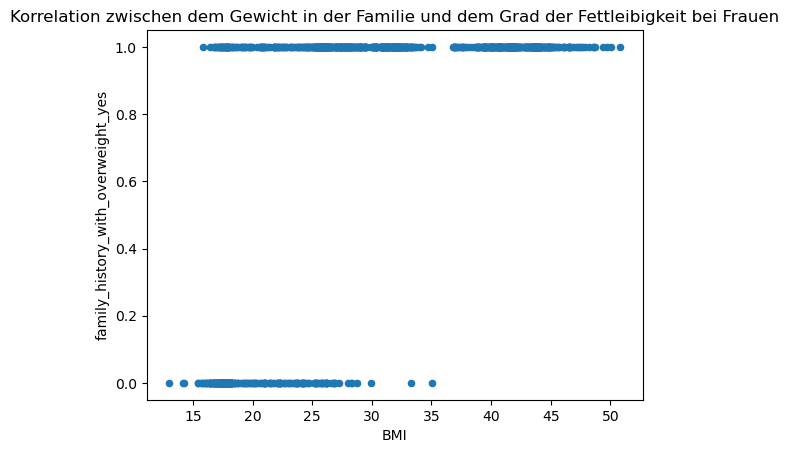

In [49]:
# Visualisierung der Korrelation für die zweite Hypothese

data_women.plot(x='BMI',  y='family_history_with_overweight_yes', kind='scatter', title='Korrelation zwischen dem Gewicht in der Familie und dem Grad der Fettleibigkeit bei Frauen')

plt.show()

Erklärung

Die obige Visualisierung ist ein Streudiagramm, das die Beziehung zwischen dem BMI (Body Mass Index) und der familiären Vorgeschichte von Übergewicht (family_history_with_overweight_yes) bei Frauen darstellt.

Die X-Achse stellt den BMI dar.
Die Y-Achse zeigt den binären Wert für die familiäre Vorgeschichte von Übergewicht:
0 = Keine familiäre Vorgeschichte von Übergewicht
1 = Familiäre Vorgeschichte von Übergewicht

Fazit

Das Streudiagramm zeigt, dass Frauen mit einer familiären Vorgeschichte von Übergewicht (family_history_with_overweight_yes = 1) tendenziell höhere BMI-Werte aufweisen. Die meisten Frauen mit einer familiären Vorgeschichte von Übergewicht haben BMI-Werte im Bereich von 25 bis 35, während Frauen ohne diese Vorgeschichte (family_history_with_overweight_yes = 0) eher niedrigere BMI-Werte haben. Dies unterstützt die Hypothese, dass eine familiäre Vorgeschichte von Übergewicht das Risiko für Fettleibigkeit erhöht. Der Median-BMI in der Gruppe mit familiärer Vorgeschichte von Übergewicht ist höher, was auf eine signifikante positive Beziehung hinweist.

# Korrelation Hypothese 3

In [50]:
data_women[['BMI', 'CAEC_encoded']].corr()

,BMI,CAEC_encoded
BMI,1.0000,-0.4097
CAEC_encoded,-0.4097,1.0000


Diese Korrelation zeigt eine mäßig negative Beziehung zwischen dem Body-Mass-Index (BMI) und dem Naschen zwischen den Mahlzeiten (CAEC_encoded). Ein Korrelationskoeffizient von -0,41 deutet darauf hin, dass ein höherer BMI mit weniger Naschen zwischen den Mahlzeiten verbunden ist, und umgekehrt. Diese Beziehung ist nicht extrem stark, aber sie zeigt eine gewisse Tendenz, dass Personen mit höherem BMI tendenziell weniger zwischen den Mahlzeiten naschen.

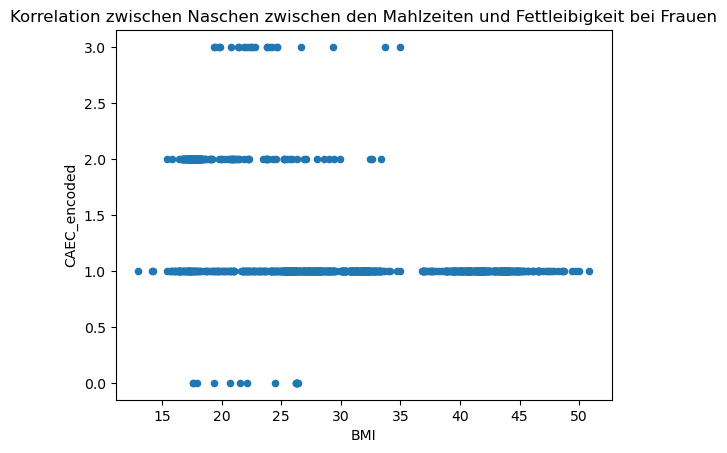

In [51]:
# Visualisierung der Korrelation für die dritte Hypothese

data_women.plot(x='BMI',  y='CAEC_encoded', kind='scatter', title='Korrelation zwischen Naschen zwischen den Mahlzeiten und Fettleibigkeit bei Frauen')

plt.show()

Erklärung

Die obige Visualisierung ist ein Streudiagramm, das die Beziehung zwischen dem BMI (Body Mass Index) und dem Naschen zwischen den Mahlzeiten (CAEC_encoded) bei Frauen darstellt.

Die X-Achse stellt den BMI dar.
Die Y-Achse zeigt den kodierten Wert für das Naschen zwischen den Mahlzeiten:
0 = Nie
1 = Manchmal
2 = Häufig
3 = Immer

Fazit

Das Diagramm zeigt eine höhere negative Korrelation .Dies legt nahe , dass andere Faktoren eine Rolle spielen könnten , die Fettleibigkeit bei den Frauen zu haben

# Korrelation Hypothese 4

In [52]:
data_women[['BMI', 'TUE']].corr()

,BMI,TUE
BMI,1.000000,-0.090933
TUE,-0.090933,1.000000


Es gibt einen sehr schwachen negativen Zusammenhang zwischen der Nutzung technologischer Geräte und dem BMI. Personen, die mehr Zeit mit technologischen Geräten verbringen, haben tendenziell einen etwas niedrigeren BMI, aber dieser Zusammenhang ist sehr gering und statistisch kaum signifikant.

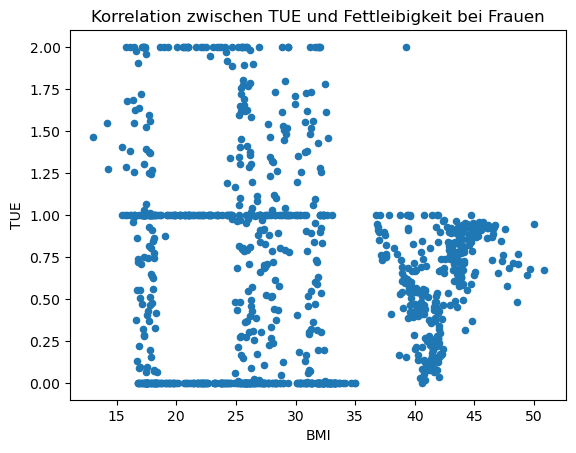

In [53]:
# Visualisierung der Korrelation für die vierte Hypothese

data_women.plot(x='BMI',  y='TUE', kind='scatter', title='Korrelation zwischen TUE und Fettleibigkeit bei Frauen')

plt.show()

Erklärung

Die obige Visualisierung ist ein Streudiagramm, das die Beziehung zwischen dem BMI (Body Mass Index) und der Nutzung technologischer Geräte (TUE) bei Frauen darstellt.

Die X-Achse stellt den BMI dar.
Die Y-Achse zeigt die tägliche Nutzung technologischer Geräte in Stunden (TUE).

Fazit

Das Streudiagramm zeigt, dass es keine eindeutige Korrelation zwischen der Nutzung technologischer Geräte und dem BMI bei Frauen gibt. Die Punkte sind über die verschiedenen Ebenen der technologischen Nutzung verstreut, ohne ein klares Muster zu zeigen. Dies deutet darauf hin, dass die Nutzung technologischer Geräte keinen signifikanten Einfluss auf den BMI und damit auf das Risiko für Fettleibigkeit bei Frauen hat. Es gibt Frauen mit hohen BMI-Werten bei allen Nutzungsstufen, was die Hypothese, dass eine höhere Nutzung technologischer Geräte mit einem höheren BMI korreliert, nicht unterstützt. Der Median-BMI zeigt keine klare Tendenz in Bezug auf die Nutzung technologischer Geräte.

#  Modelle und Prognose

# Train-Test Split
Wir teilen noch mal die Daten in Trainings- und Testdaten auf. Die Trainingsdaten werden verwendet, um das Modell zu trainieren, während die Testdaten verwendet werden, um die Leistung des Modells  zu evaluieren.

Die Korrelation hat uns gezeigt, dass bestimmte prädiktive Variablen keinen signifikanten Einfluss auf das Niveau der Fettleibigkeit bei Frauen hatte.

Das Ziel unserer Studie ist es, Algorithmen zu entwickeln und zu trainieren, die bessere Prognosen über das Niveau der Fettleibigkeit bei Frauen (BMI) liefern können. Hierfür verwenden wir ausschließlich die Vorhersagevariablen, die eine Korrelation mit dem BMI aufweisen. Variablen, die keine Korrelation zeigen, werden aus der Analyse ausgeschlossen.

In [54]:
#Trennung der Daten in Train-set und Test-set

X_women = data_women.drop(columns=['BMI', 'NObeyesdad','TUE','CAEC_encoded','CALC','CAEC'])

y_women = data_women['BMI']

In [55]:
X_women_train, X_women_test, y_women_train, y_women_test = train_test_split(
    X_women, y_women, test_size=0.3, random_state=42, ) 

print(f"X_train: {X_women_train.shape}")
print(f"y_train: {y_women_train.shape}")
print(f"X_test: {X_women_test.shape}")
print(f"y_test: {y_women_test.shape}")

X_train: (730, 5)
y_train: (730,)
X_test: (313, 5)
y_test: (313,)


## OLS Regression

Im Folgenden werden wir noch eine OLS Regression durchführen. Dies dient als Referenzpunkt für die Regularisierungsverfahren, die wir später anwenden werden.

In [56]:
# Führe eine OLS-Regression auf den Trainingsdaten durch.
# Erstelle ein lineares Regressionsobjekt.
FIT_INTERCEPT = True

ModelOls = LinearRegression(fit_intercept=FIT_INTERCEPT)
ModelOls.fit(X_women_train, y_women_train)

print("Coefficients: \n", ModelOls.coef_)

Coefficients: 
 [-3.41157069e+01  3.44719346e-01  9.69759067e-01  3.66386231e-01
  2.86123132e-02]


In [57]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definiere Regressionsmodelle

models = {
    "RandomForestRegressor": RandomForestRegressor(),
    "LGBMRegressor": LGBMRegressor(verbose=-1),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
}

# Trainiere und bewerte Regressionsmodelle
for model_name, model in models.items():
    model.fit(X_women_train, y_women_train)
    predictions = model.predict(X_women_test)
    
    mse = mean_squared_error(y_women_test, predictions)
    mae = mean_absolute_error(y_women_test, predictions)
    r2 = r2_score(y_women_test, predictions)
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")

    
    # Berechne den mittleren absoluten prozentualen Fehler (MAPE)
    mape = np.mean(np.abs((y_women_test - predictions) / y_women_test)) * 100
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    
    print("=" * 50)

Model: RandomForestRegressor
Mean Squared Error: 0.14
Mean Absolute Error: 0.23
R-squared: 1.00
Mean Absolute Percentage Error (MAPE): 0.81%
Model: LGBMRegressor
Mean Squared Error: 0.27
Mean Absolute Error: 0.30
R-squared: 1.00
Mean Absolute Percentage Error (MAPE): 1.03%
Model: DecisionTreeRegressor
Mean Squared Error: 0.38
Mean Absolute Error: 0.37
R-squared: 1.00
Mean Absolute Percentage Error (MAPE): 1.31%
Model: ExtraTreesRegressor
Mean Squared Error: 0.13
Mean Absolute Error: 0.18
R-squared: 1.00
Mean Absolute Percentage Error (MAPE): 0.65%


# MODEL SELECTION

Analyse der Ergebnisse für Frauen

Vergleichskriterien:

Mean Squared Error (MSE): Je niedriger dieser Wert, desto besser ist das Modell.
Mean Absolute Error (MAE): Ebenfalls, je niedriger dieser Wert, desto besser ist das Modell.
R-squared (R²): Je näher dieser Wert an 1 ist, desto besser ist das Modell.
Mean Absolute Percentage Error (MAPE): Je niedriger dieser Wert, desto besser ist das Modell.

Analyse der Ergebnisse für jedes Modell:

1- **RandomForestRegressor**

Mean Squared Error (MSE): 0.13 zeigt, dass die quadratischen Fehler der Vorhersagen sehr gering sind, was auf präzise Vorhersagen hinweist.

Mean Absolute Error (MAE): 0.23 ist ebenfalls niedrig, was bedeutet, dass die Vorhersagen im Durchschnitt um 0.23 Einheiten von den tatsächlichen Werten abweichen.

R-squared (R²): 1.00 bedeutet, dass das Modell 100% der Varianz der Daten erklärt, was ein hervorragender Indikator für die Qualität der Vorhersagen ist.

Mean Absolute Percentage Error (MAPE): 0.80% zeigt, dass die Vorhersagen des Modells sehr nahe an den tatsächlichen Werten sind, was besonders für Anwendungen, bei denen relative Genauigkeit wichtig ist, exzellent ist.

Schlussfolgerung: Der RandomForestRegressor ist sehr leistungsfähig mit niedrigen durchschnittlichen Fehlern und einer hohen Fähigkeit, die Varianz der Daten zu erklären. Er ist zuverlässig für präzise und konsistente Vorhersagen.

2- **LGBMRegressor**

Mean Squared Error (MSE): 0.27 ist höher als beim RandomForestRegressor, was auf etwas weniger präzise Vorhersagen hinweist.

Mean Absolute Error (MAE): 0.30 ist ebenfalls höher, was bedeutet, dass die Vorhersagen weniger präzise sind.

R-squared (R²): 1.00 zeigt, dass das Modell 100% der Varianz der Daten erklärt.

Mean Absolute Percentage Error (MAPE): 1.03% ist höher als beim RandomForestRegressor, was auf weniger präzise Vorhersagen in Prozent hinweist.

Schlussfolgerung: Der LGBMRegressor ist ebenfalls leistungsfähig, hat aber eine höhere MSE, MAE und MAPE im Vergleich zum RandomForestRegressor. Er bleibt jedoch ein zuverlässiges Modell mit guter Vorhersagefähigkeit.

3- **DecisionTreeRegressor**

Mean Squared Error (MSE): 0.33 ist höher als bei den anderen Modellen, was auf weniger präzise Vorhersagen hinweist.

Mean Absolute Error (MAE): 0.35 ist ebenfalls höher, was auf weniger präzise Vorhersagen hinweist.

R-squared (R²): 1.00 zeigt, dass das Modell 100% der Varianz der Daten erklärt, aber die anderen Metriken zeigen eine geringere Leistung.

Mean Absolute Percentage Error (MAPE): 1.26% ist der höchste unter den Modellen, was auf die größten prozentualen Fehler hinweist.

Schlussfolgerung: Der DecisionTreeRegressor ist das am wenigsten leistungsfähige Modell unter den bewerteten Modellen, mit höheren durchschnittlichen Fehlern und einer geringeren Gesamtgenauigkeit. Es bleibt jedoch ein nützliches Modell, aber weniger effektiv als die anderen.

4- **ExtraTreesRegressor**

Mean Squared Error (MSE): 0.13 ist niedrig und zeigt sehr präzise Vorhersagen.

Mean Absolute Error (MAE): 0.18 ist der niedrigste Wert, was auf sehr präzise Vorhersagen hinweist.

R-squared (R²): 1.00 zeigt, dass das Modell 100% der Varianz der Daten erklärt, was exzellent ist.

Mean Absolute Percentage Error (MAPE): 0.65% ist der niedrigste Wert, was auf minimale prozentuale Fehler hinweist.

Schlussfolgerung: Der ExtraTreesRegressor ist das leistungsstärkste Modell unter den bewerteten Modellen mit den besten Metriken in allen Kategorien. Er bietet äußerst präzise Vorhersagen mit minimalen Fehlern.

**Schlussfolgerung und Entscheidung**
Nach einer detaillierten Analyse jedes Modells sind die beiden besten Modelle:

*ExtraTreesRegressor*: Er übertrifft in allen Metriken mit der niedrigsten MSE, MAE und MAPE sowie einem R² von 1.00. Dieses Modell ist das genaueste und zuverlässigste.
*RandomForestRegressor*: Obwohl leicht unter dem ExtraTreesRegressor, zeigt dieses Modell sehr solide Leistungen mit Metriken, die denen des ExtraTreesRegressor sehr nahe kommen. Es ist zuverlässig und genau für hochwertige Vorhersagen.

Daher haben wir uns entschieden, den **ExtraTreesRegressor** als bestes Modell basierend auf den bereitgestellten Bewertungskriterien auszuwählen.



**Wichtige Bemerkung:  je mehr die Algorithmen trainiert werden oder je mehr das Programm ausgeführt wird, desto mehr ändert sich die Ergebnisse. Die Ergebnisse, die auf den Fazit erwähnt worden sind, entsprechend nur das erste Trainieren und könnte je nach Trainieren oder wie viel mal sie das Programm ausführen ändern**

Angesicht der Tatsache , dass wir  die Regression- Modelle verwendet haben, lässt sich schwierig , eine Confusion matrix zu erstellen. 

Nichtsdestotrozt werden wir versuchen, die Performance der verschiedenen Modelle Grafisch darzustellen und am Ende die beste Modelle auswählen

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 495
[LightGBM] [Info] Number of data points in the train set: 730, number of used features: 5
[LightGBM] [Info] Start training from score 30.380445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

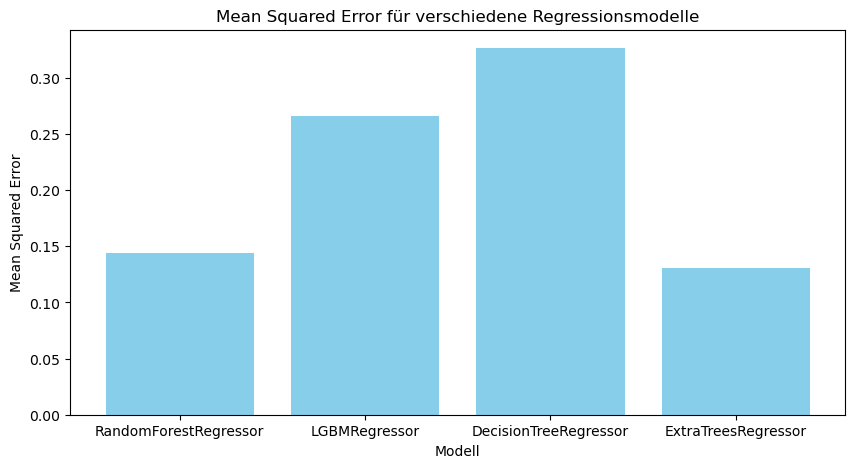

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Definieren der Modelle
models = {
    "RandomForestRegressor": RandomForestRegressor(),
    "LGBMRegressor": LGBMRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor()
}

# Dictionary zum Speichern von Leistungsmetriken
performance_metrics = {}

# Schleife über jedes Modell und Auswertung seiner Leistung
for model_name, model in models.items():
    # Das Modell anpassen
    model.fit(X_women_train, y_women_train)
    
    # Vorhersagen
    y_women_pred = model.predict(X_women_test)
    
    # Berechnen der Leistungsmetriken
    mse = mean_squared_error(y_women_test, y_women_pred)
    mae = mean_absolute_error(y_women_test, y_women_pred)
    r2 = r2_score(y_women_test, y_women_pred)
    
    # Metriken im Dictionary speichern
    performance_metrics[model_name] = {"MSE": mse, "MAE": mae, "R-Quadrat": r2}

# Leistungsmetriken anzeigen und plotten
for model_name, metrics in performance_metrics.items():
    print(f"Modell: {model_name}")
    print(f"Mean Squared Error: {metrics['MSE']:.2f}")
    print(f"Mean Absolute Error: {metrics['MAE']:.2f}")
    print(f"R-Quadrat: {metrics['R-Quadrat']:.2f}")
    print("=" * 50)

# MSE für jedes Modell plotten
plt.figure(figsize=(10, 5))
model_names = list(performance_metrics.keys())
mse_values = [metrics["MSE"] for metrics in performance_metrics.values()]
plt.bar(model_names, mse_values, color='skyblue')
plt.xlabel('Modell')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error für verschiedene Regressionsmodelle')
plt.show()


Auf diesem Diagramm sind die verschiedenen Modelle sowie deren mittlere quadratische Fehler (Mean Squared Error) dargestellt. Wir stellen fest, dass das Modell, das mit sehr geringer Fehlerquote prognostiziert, der ExtraTreesRegressor ist, mit einem Wert von etwa 0,12, gefolgt vom RandomForestRegressor und LGBMRegressor mit etwa 0,14 und 0,27. Das Modell DecisionTreeRegressor weist einen wesentlich höheren mittleren quadratischen Fehler auf, nämlich 0,41.

# Entscheidung: 

Unter Berücksichtung unserer Analyse treffen wir die Entscheidung, die ExtraTreesRegressor- Modelle noch als beste Modelle für Prognose der Fettleibigkeit auch bei **Frauen** auszuwählen.

# END-WORT

Wir am Ende unserer Forschung gekommen und haden wir gemerkt , dass nicht nur die Ernährung sondern auch die Familiäre Vorgeschichte und Teilweise den Konsum von Alcohol   einen Einfluss auf die Fettleibkeit der Menschen Haben Können. Zu dem würden wir empfehlen, eine gesund bewusste Ernährung zu haben, um dieses gesundheitliches Problem vorzubeugen.